In [56]:
import numpy as np 
from numpy.random import RandomState
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
import pandas as pd
%matplotlib inline

In [57]:
prng = RandomState(123455689)

<b>Discrete White Noise</b>

Consider a time series ${wt:t=1,...n}{wt:t=1,...n}$. If the elements of the series, wiwi, are independent and identically distributed (i.i.d.), with a mean of zero, variance $σ2$ and no serial correlation (i.e. Cor(wi,wj)≠0,∀i≠jCor(wi,wj)≠0,∀i≠j) then we say that the time series is discrete white noise (DWN).

In [71]:
# A discrete white noise of size 1000
dwn = prng.randn(1000)

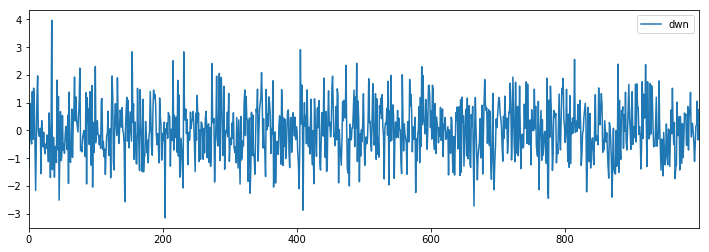

In [72]:
df = pd.DataFrame({'dwn':dwn})
df.plot(figsize=(12,4))

<h5>Second-Order Properties</h5>

The second-order properties of DWN are straightforward and follow easily from the actual definition. In particular, the mean of the series is zero and there is no autocorrelation by definition:

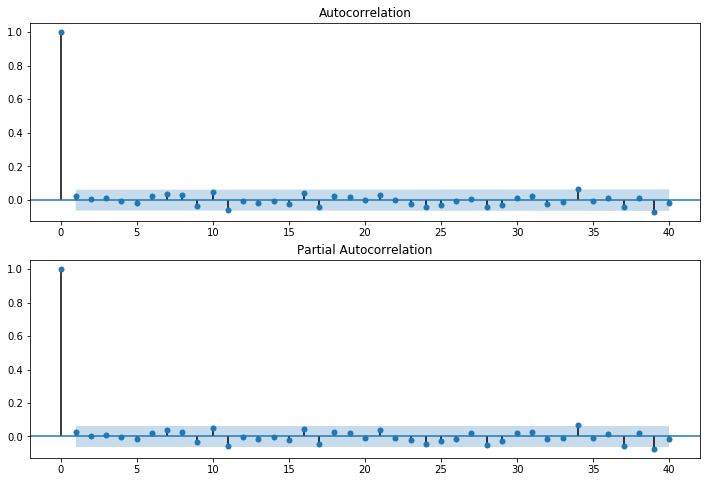

In [73]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# Plot autocorrelation 
fig = sm.graphics.tsa.plot_acf(dwn, lags=40, ax=ax1)
# Plot Partial Auto Correlation 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dwn, lags=40, ax=ax2)

<h5>Random Walk</h5>

A random walk is a time series model $xt$ such that $xt=xt−1+wt$, where $wt$ is a discrete white noise series.

In [77]:
# Generate ouw own random walk 

rw = prng.randn(1000)
for t in range(1,1000):
    rw[t] = rw[t-1] + dwn[t] 

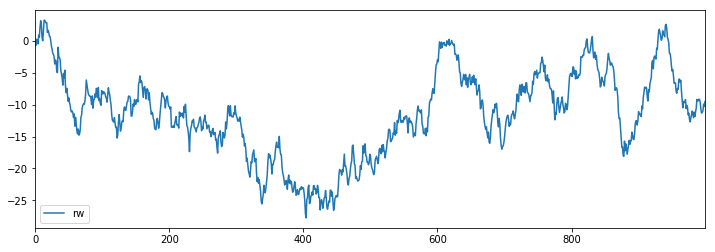

In [75]:
df = pd.DataFrame({'rw':rw})
df.plot(figsize=(12,4))

<h5>Second-Order Properties</h5>

The second-order properties of a random walk are a little more interesting than that of discrete white noise. While the mean of a random walk is still zero, the covariance is actually time-dependent. Hence a random walk is non-stationary:

$$μxγk(t)==0Cov(xt,xt+k)=tσ2$$
$$μx=0γk(t)=Cov(xt,xt+k)=tσ2$$
In particular, the covariance is equal to the variance multiplied by the time. Hence, as time increases, so does the variance.

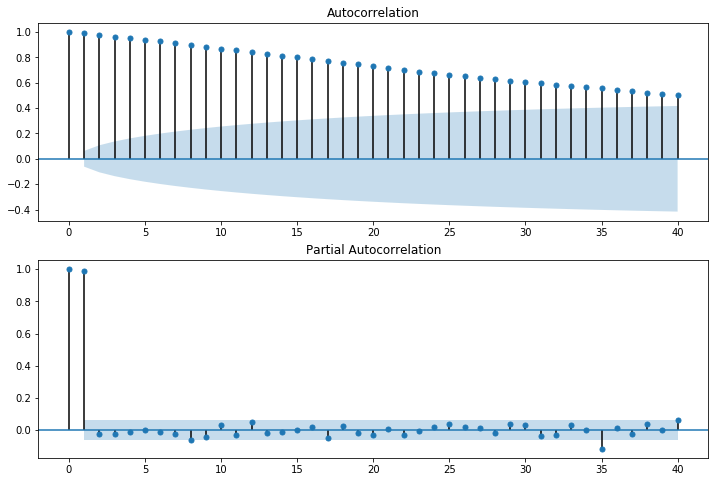

In [76]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# Plot autocorrelation 
fig = sm.graphics.tsa.plot_acf(rw, lags=40, ax=ax1)
# Plot Partial Auto Correlation 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(rw, lags=40, ax=ax2)

<h4>Correlogram</h4>

The autocorrelation of a random walk (which is also time-dependent) can be derived as follows:

ρk(t)=Cov(xt,xt+k)Var(xt)Var(xt+k)‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾√=tσ2tσ2(t+k)σ2‾‾‾‾‾‾‾‾‾‾‾√=11+k/t‾‾‾‾‾‾√
ρk(t)=Cov(xt,xt+k)Var(xt)Var(xt+k)=tσ2tσ2(t+k)σ2=11+k/t
Notice that this implies if we are considering a long time series, with short term lags, then we get an autocorrelation that is almost unity. That is, we have extremely high autocorrelation that does not decrease very rapidly as the lag increases.

We will now try to extract discrete white noise from Random Walk usinf differential 

In [80]:
rw_diff = np.diff(rw)

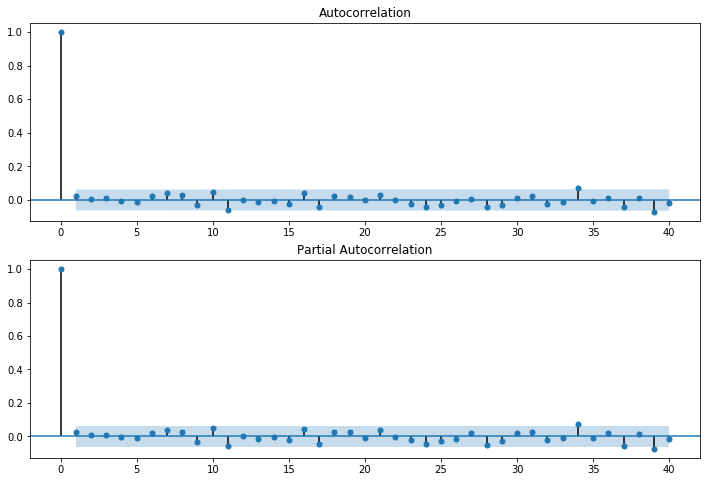

In [83]:
# we expect to see correlogram of discrete white noise 
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# Plot autocorrelation 
fig = sm.graphics.tsa.plot_acf(rw_diff, lags=40, ax=ax1)
# Plot Partial Auto Correlation 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(rw_diff, lags=40, ax=ax2)